In [37]:
from platform import python_version
import sys
sys.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET #Parse and read XML data
import tarfile #read from tarfile instead of extracting all data
import xml.etree.ElementTree as ET
from collections import Counter
import trec
import pprint as pp
import pickle
import site
site.getsitepackages()
import tarfile
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.feature_extraction.text import TfidfVectorizer
# Numpy for data management
import numpy as np

# Pandas also for data management
import pandas as pd

# Matplotlib for additional customization
#import pyplot as plt
#%matplotlib inline

import matplotlib.pyplot as plt

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer

import trec
import pprint as pp
import pickle

from collections import defaultdict #I'm importing this library so we have a code with less lists!!

In [38]:
import re

def getGender(text):
    male = [" male ", " boy ", " man "]
    female = [" female "," girl ", " woman "]
    res_male = False
    res_female = False
    res_male = any(ele in text for ele in male)
    res_female = any(ele2 in text for ele2 in female)
    if (res_male):
        return "Male"
    if (res_female):
        return "Female"
    if not res_male and not res_female:
        return "NA"
    
def getAge(text):
    x = re.search("((\d{1,2})\syear\sold)|((\d{1,2})[-]year[-]old)|((\d{1,2})\syo)|((\d{1,2})[-]year\sold)", text)
    if(not x):
        y = re.search("((\d{1,2})\smonth\sold)|((\d{1,2})[-]month[-]old)|((\d{1,2})\syo)|((\d{1,2})[-]month\sold)", text)
        if(not y):
            age = "NA"
        else:
            age = 0
    else:
        age = (x.group(2) or x.group(4) or x.group(6) or x.group(8))
    return age


def sum_numbers(numbers):
    total = 0
    for number in numbers:
        total += number
    return total
    

In [39]:

# https://wiki.python.org/moin/UsingPickle
import pickle

Queries = "topics-2014_2015-summary.topics"
Qrels = "qrels-clinical_trials.txt"
with open(Queries, 'r') as queries_reader:
    txt = queries_reader.read()

root = ET.fromstring(txt)

cases = {}
genders = {}
ages = {}
for query in root.iter('TOP'):
    q_num = query.find('NUM').text
    q_title = query.find('TITLE').text
    cases[q_num] = q_title
    genders[q_num] = getGender(q_title)
    ages[q_num] = getAge(q_title)

eval = trec.TrecEvaluation(cases, Qrels)

#list(cases.values())

# pp.pprint(cases)


ONLY RUN ONCE THE CODE BELOW, TO GET DOC_IDS.BIN, brief_titles.BIN, detailed_descriptions.BIN, brief_summaries.BIN, criterias.BIN, genders.BIN,
minimum_ages.BIN, maximum_ages.BIN FILES

In [4]:
import xml.etree.ElementTree as ET
import tarfile

tar = tarfile.open("clinicaltrials.gov-16_dec_2015.tgz", "r:gz")
i = 0
ids = []
list_brief_title = []
list_detailed_description = []
list_brief_summary = []
list_criteria = []
list_gender = []
list_minimum_age = []
list_maximum_age = []

j = 0
for tarinfo in tar:
    if tarinfo.size > 500:
        txt = tar.extractfile(tarinfo).read().decode("utf-8", "strict")
        root = ET.fromstring(txt)

        judged = False
        for doc_id in root.iter('nct_id'):
            if doc_id.text in eval.judged_docs:
                judged = True
        
        if judged is False:
            continue
            
        #"NCT02006251" the one that doesnt has gender
        
        i = i + 1
        #print(doc_id.text.strip())
        for brief_title in root.iter('brief_title'):
            #print("brief_title: ", brief_title.text)
            brief = ""
            if(not (brief_title.text.strip() and not brief_title.text.isspace())):
                brief = "Empty"               
            else:
                brief = brief_title.text           
            
            list_brief_title.append(brief)
            ids.append(doc_id.text)          
           
        existsDetDesc = False
        for detailed_description in root.iter('detailed_description'):
            for child in detailed_description:
                #print("detailed_description: ", child.text.strip())  
                existsDetDesc = True
                #print(child.text.strip())
                detailed_desc = ""
                if(not (child.text.strip() and not child.text.isspace())):                    
                    detailed_desc = brief_title.text
                    print(detailed_desc)
                else:
                    detailed_desc = child.text.strip()
                #print(detailed_desc)
                list_detailed_description.append(detailed_desc)
        if(not existsDetDesc):
            list_detailed_description.append(brief_title.text)       
            
        existsBriefSummary = False
        for brief_summary in root.iter('brief_summary'):
            for child in brief_summary:
                #print("brief_summary: ", child.text.strip())
                existsBriefSummary = True
                brief_sum = ""
                if(not (child.text.strip() and not child.text.isspace())):                    
                    brief_sum = brief_title  .text                  
                else:
                    brief_sum = child.text.strip()
                    
                list_brief_summary.append(brief_sum)
        if(not existsBriefSummary):
            list_brief_summary.append(brief_title.text)
        
        existsCriteria = False
        for criteria in root.iter('criteria'):
            for child in criteria:
                #print("criteria: ", child.text.strip())
                existsCriteria = True
                crit = ""
                if(not (child.text.strip() and not child.text.isspace())):                    
                    crit = "Undisclosed"
                    print(crit)
                else:
                    crit = child.text.strip()
                list_criteria.append(crit)
        if(not existsCriteria):
            list_criteria.append("Undisclosed")
        
        existsGender = False
        for gender in root.iter('gender'):
            existsGender = True
            genr = ""
            if(not (gender.text.strip() and not gender.text.isspace())):                    
                genr = "Both"
                #print(genr)
            else:
                genr = gender.text.strip()
            list_gender.append(genr)
        if(not existsGender):
            list_gender.append("Both")
        
        existsMinAge = False
        for minimum_age in root.iter('minimum_age'):
            #print("minimum_age: ", minimum_age.text)
            existsMinAge = True
            min_a = ""
            if(not (minimum_age.text.strip() and not minimum_age.text.strip() == "N/A" and not minimum_age.text.isspace())):                    
                min_a = "0 Years"
               # print(min_a)
            else:
                min_a = minimum_age.text.strip()
            #print(min_a)
            list_minimum_age.append(min_a)
        if(not existsMinAge):
            list_minimum_age.append("0 Years")
            
        existsMaxAge = False
        for maximum_age in root.iter('maximum_age'):
            #print("maximum_age: ", maximum_age.text)
            existsMaxAge = True
            max_a = ""
            if(not (maximum_age.text.strip() and not maximum_age.text.strip() == "N/A" and not maximum_age.text.isspace())):                    
                max_a = "100 Years"
                #print(max_a)
            else:
                max_a = maximum_age.text.strip()
            #print(max_a)
            list_maximum_age.append(max_a)
        if(not existsMaxAge):
            list_maximum_age.append("100 Years")

tar.close()

print(i) #3626
print(len(list_brief_title)) #3626
print(len(ids)) #3626
print(len(list_detailed_description)) #3626
print(len(list_brief_summary)) #3626
print(len(list_criteria)) #3626
print(len(list_gender)) #3626
print(len(list_minimum_age)) #3626
print(len(list_maximum_age)) #3626
#print(list_gender)

pickle.dump(list_brief_title, open( "brief_titles.bin", "wb" ) )
pickle.dump(ids, open( "doc_ids.bin", "wb" ) )
pickle.dump(list_detailed_description, open( "detailed_descriptions.bin", "wb" ) )
pickle.dump(list_brief_summary, open( "brief_summaries.bin", "wb" ) )
pickle.dump(list_criteria, open( "criterias.bin", "wb" ) )
pickle.dump(list_gender, open( "genders.bin", "wb" ))
pickle.dump(list_minimum_age, open( "minimum_ages.bin", "wb" ))
pickle.dump(list_maximum_age, open( "maximum_ages.bin", "wb" ))


3626
3626
3626
3626
3626
3626
3626
3626
3626


3626


'Female'

### Here we have functions for VSM and LMJM that will calculate scores

In [40]:
    def VSM(corpus):
        
        dictionary_metrics_vsm=defaultdict(list) # defaultdict(<class 'list'>, {})
        dicqueryID = dict()
        dicpatientID = dict()
        out_scores_vsm = []
        avg_precision_11point = np.zeros(11)
        index = TfidfVectorizer(ngram_range=(1,1), analyzer='word', stop_words = None)
        index.fit(corpus)
        X = index.transform(corpus)  
        for caseid in cases:
            query = cases[caseid]
            query_tfidf = index.transform([query]) 
            doc_scores = 1 - pairwise_distances(X, query_tfidf, metric='cosine') #DOCUMENT SCORE
            query_id = [caseid] * len(ids)
            results = pd.DataFrame(list(zip(query_id, ids, doc_scores)), columns = ['caseid','_id', 'score'])
            results_ord = results.sort_values(by=['score'], ascending = False)           
                
            out_scores_vsm.append(results_ord) #We want to return out_scores_vsm
            
            '''Evaluation Metrics:'''
            [p10, recall, ap, ndcg5, mrr] = eval.eval(results_ord, caseid)
            [precision_11point, recall_11point, total_relv_ret] = eval.evalPR(results_ord, caseid)
            
            '''I guess not needed? It makes a dictionary with caseID as key and values of metrics
            dicqueryID[caseid] = p10
            dicpatientID[caseid] = ap
            '''
            
            '''Dictionary of Metrics so we can return a full dictionary with all the metrics:'''
            dictionary_metrics_vsm['P10s:'].append(p10)
            dictionary_metrics_vsm['Recalls:'].append(recall)
            dictionary_metrics_vsm['Aps:'].append(ap)
            dictionary_metrics_vsm['Ndcg5s:'].append(ndcg5)
            dictionary_metrics_vsm['Mrrs:'].append(mrr)
            
            if (np.shape(recall_11point) != (0,)):
                avg_precision_11point = avg_precision_11point + precision_11point
            
        '''Average of each Metrics:'''
        average_P10s_vsm = np.mean(dictionary_metrics_vsm['P10s:'])
        average_Recalls_vsm = np.mean(dictionary_metrics_vsm['Recalls:'])
        average_Aps_vsm = np.mean(dictionary_metrics_vsm['Aps:'])
        average_Ndcg5s_vsm = np.mean(dictionary_metrics_vsm['Ndcg5s:'])
        average_Mrrs_vsm = np.mean(dictionary_metrics_vsm['Mrrs:'])
                    
        #print(results_ord)
        return out_scores_vsm
        
    def LMJM(corpus):    
        
        dictionary_metrics_lmjm=defaultdict(list) # defaultdict(<class 'list'>, {})
        avg_precision_11point_jm = np.zeros(11)      
        l=0.8
        out_scores_lmjm = []
        for caseid in cases:
            index_cv = CountVectorizer(ngram_range=(1,1), analyzer='word', stop_words = None) 
            index_cv.fit(corpus)
            X2 = index_cv.transform(corpus) #Compute corpus representation  corpus_cv
            corpus_array=X2.toarray()
            query_cv = index_cv.transform([cases[caseid]])
            qq = query_cv.toarray()[0]

            A=len((corpus))  
            aa = np.tile(qq, [A,1]) 

            prob_word_docs = corpus_array.T/np.sum(corpus_array,axis=1) # divided by doclength
            prob_word_corpus = np.sum(corpus_array, axis=0)/np.sum(corpus_array)
            prob_word_docs_query =(1-l)*(prob_word_docs.T**aa)
            prob_word_corpus_query = l*(prob_word_corpus**aa)
            docs_scores = prob_word_docs_query + prob_word_corpus_query
            final = np.prod(docs_scores, axis = 1)
            query_id = [caseid] * len(ids)
            results = pd.DataFrame(list(zip(query_id, ids, final)), columns = ['caseid','_id', 'score'])
            results_ord = results.sort_values(by=['score'], ascending = False)
            out_scores_lmjm.append(results_ord)
            
            '''Evaluation Metrics:'''
            [p10, recall, ap, ndcg5, mrr] = eval.eval(results_ord, caseid)
            [precision_11point, recall_11point, total_relv_ret] = eval.evalPR(results_ord, caseid)
            
            '''I guess not needed? It makes a dictionary with caseID as key and values of metrics
            dicqueryID[caseid] = p10
            dicpatientID[caseid] = ap
            dicRecall[caseid] = recall
            dicndcg5[caseid] = ndcg5
            dicMrr[caseid] = mrr'''
            
            '''Dictionary of Metrics so we can return a full dictionary with all the metrics:'''
            dictionary_metrics_lmjm['P10s:'].append(p10)
            dictionary_metrics_lmjm['Recalls:'].append(recall)
            dictionary_metrics_lmjm['Aps:'].append(ap)
            dictionary_metrics_lmjm['Ndcg5s:'].append(ndcg5)
            dictionary_metrics_lmjm['Mrrs:'].append(mrr)
            
            if (np.shape(recall_11point) != (0,)):
                avg_precision_11point_jm = avg_precision_11point_jm + precision_11point
            
        '''Average of each Metrics:'''
        average_P10s_lmjm = np.mean(dictionary_metrics_lmjm['P10s:'])
        average_Recalls_lmjm = np.mean(dictionary_metrics_lmjm['Recalls:'])
        average_Aps_lmjm = np.mean(dictionary_metrics_lmjm['Aps:'])
        average_Ndcg5s_lmjm = np.mean(dictionary_metrics_lmjm['Ndcg5s:'])
        average_Mrrs_lmjm = np.mean(dictionary_metrics_lmjm['Mrrs:'])
            
        #print(results_ord)
        return out_scores_lmjm

Upload all necessary files

In [41]:
import pickle

brief_titles = pickle.load( open( "brief_titles.bin", "rb" ) )
detailed_descriptions = pickle.load( open( "detailed_descriptions.bin", "rb" ) )
brief_summaries = pickle.load( open( "brief_summaries.bin", "rb" ) )
criterias = pickle.load( open( "criterias.bin", "rb" ) )
brief_titles = pickle.load( open( "brief_titles.bin", "rb" ) )
ids = pickle.load( open( "doc_ids.bin", "rb" ))
list_gender = pickle.load( open( "genders.bin", "rb" ))
list_minimum_age = pickle.load( open( "minimum_ages.bin", "rb"))
list_maximum_age = pickle.load( open( "maximum_ages.bin", "rb" ))
                         


### Now get similarity scores for each query and corpus field

In [7]:
#Formula to get score LMJM
m1=LMJM(detailed_descriptions) 
m2=LMJM(brief_summaries)
m3=LMJM(criterias)
m4=LMJM(brief_titles)

#Formula to get scores VSM
m5=VSM(detailed_descriptions) 
m6=VSM(brief_summaries)
m7=VSM(criterias)
m8=VSM(brief_titles)

                     
                            
pickle.dump(m1, open( "m1.bin", "wb" ) )
pickle.dump(m2, open( "m2.bin", "wb" ) )
pickle.dump(m3, open( "m3.bin", "wb" ) )
pickle.dump(m4, open( "m4.bin", "wb" ) )


pickle.dump(m5, open( "m5.bin", "wb" ) )
pickle.dump(m6, open( "m6.bin", "wb" ) )
pickle.dump(m7, open( "m7.bin", "wb" ) )
pickle.dump(m8, open( "m8.bin", "wb" ) )

Load all features

In [42]:
m1 = pickle.load( open( "m1.bin", "rb" ) )
m2 = pickle.load( open( "m2.bin", "rb" ) )
m3 = pickle.load( open( "m3.bin", "rb" ) )
m4 = pickle.load( open( "m4.bin", "rb" ) )
m5 = pickle.load( open( "m5.bin", "rb" ) )
m6 = pickle.load( open( "m6.bin", "rb" ) )
m7 = pickle.load( open( "m7.bin", "rb" ) )
m8 = pickle.load( open( "m8.bin", "rb" ) )

### Create a dataframe with (query_id, doc_id and rels) and 8 features 

In [9]:
triplets=[]
qrels = open('qrels-clinical_trials.txt', 'r')
lines = qrels.readlines()
final = {}
for line in lines:
    line=line.strip()
    line=line.split('\t')
    rel = '1'
    if line[-1] != '2':
        rel = line[-1]
    #print(line[2])
    #m1
    _m1 = 0
    for df in m1:
        if (df.values[0]==line[0]).any():
            #print("yes")
            if(df['_id']==line[2]).any():
                #print("found id")
                df = df.set_index(['caseid', '_id'])
                _m1 = df.at[(line[0], line[2]), 'score'] #Access a single value for a row/column label pair.
                #print(df.loc[df['caseid'] == line[0]].where(df['_id'] == line[2]).dropna()['score'])
                continue
            else:
                #print("not found id")
                continue
    _m2 = 0
    for df in m2:
        if (df.values[0]==line[0]).any():
            #print("yes")
            if(df['_id']==line[2]).any():
                #print("found id")
                df = df.set_index(['caseid', '_id'])
                _m2 = df.at[(line[0], line[2]), 'score']
                #print(df.loc[df['caseid'] == line[0]].where(df['_id'] == line[2]).dropna()['score'])
                continue
            else:
               # print("not found id")
                continue
    _m3 = 0
    for df in m3:
        if (df.values[0]==line[0]).any():
            #print("yes")
            if(df['_id']==line[2]).any():
                #print("found id")
                df = df.set_index(['caseid', '_id'])
                _m3 = df.at[(line[0], line[2]), 'score']
                #print(df.loc[df['caseid'] == line[0]].where(df['_id'] == line[2]).dropna()['score'])
                continue
            else:
               # print("not found id")
                continue
    _m4 = 0
    for df in m4:
        if (df.values[0]==line[0]).any():
            #print("yes")
            if(df['_id']==line[2]).any():
                #print("found id")
                df = df.set_index(['caseid', '_id'])
                _m4 = df.at[(line[0], line[2]), 'score']
                #print(df.loc[df['caseid'] == line[0]].where(df['_id'] == line[2]).dropna()['score'])
                continue
            else:
                #print("not found id")
                continue
    _m5 = 0
    for df in m5:
        if (df.values[0]==line[0]).any():
            #print("yes")
            if(df['_id']==line[2]).any():
                #print("found id")
                df = df.set_index(['caseid', '_id'])
                _m5 = df.at[(line[0], line[2]), 'score'][0]
                #print(_m5)
                #print(df.loc[df['caseid'] == line[0]].where(df['_id'] == line[2]).dropna()['score'])
                continue
            else:
              #  print("not found id")
                continue
    _m6 = 0
    for df in m6:
        if (df.values[0]==line[0]).any():
            #print("yes")
            if(df['_id']==line[2]).any():
                #print("found id")
                df = df.set_index(['caseid', '_id'])
                _m6 = df.at[(line[0], line[2]), 'score'][0]
                #print(df.loc[df['caseid'] == line[0]].where(df['_id'] == line[2]).dropna()['score'])
                continue
            else:
               # print("not found id")
                continue
    _m7 = 0
    for df in m7:
        if (df.values[0]==line[0]).any():
            #print("yes")
            if(df['_id']==line[2]).any():
                #print("found id")
                df = df.set_index(['caseid', '_id'])
                _m7 = df.at[(line[0], line[2]), 'score'][0]
                #print(df.loc[df['caseid'] == line[0]].where(df['_id'] == line[2]).dropna()['score'])
                continue
            else:
              #  print("not found id")
                continue
    _m8 = 0
    for df in m8:
        if (df.values[0]==line[0]).any():
            #print("yes")
            if(df['_id']==line[2]).any():
                #print("found id")
                df = df.set_index(['caseid', '_id'])
                _m8 = df.at[(line[0], line[2]), 'score'][0]
                #print(df.loc[df['caseid'] == line[0]].where(df['_id'] == line[2]).dropna()['score'])
                continue
            else:
              #  print("not found id")
                continue
            
            
            
        
        
    
    triplets.append((line[0],line[2],rel,_m1,_m2, _m3,_m4,_m5,_m6, _m7,_m8))    
    
    
    
print(len(triplets))

pickle.dump(triplets, open( "triplets.bin", "wb" ) )

/tmp/ipykernel_1303032/4076951466.py:67: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (df.values[0]==line[0]).any():
/tmp/ipykernel_1303032/4076951466.py:81: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (df.values[0]==line[0]).any():
/tmp/ipykernel_1303032/4076951466.py:94: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (df.values[0]==line[0]).any():
/tmp/ipykernel_1303032/4076951466.py:107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (df.values[0]==line[0]).any():


3870


The error message is alright, see here: https://stackoverflow.com/questions/40659212/futurewarning-elementwise-comparison-failed-returning-scalar-but-in-the-futur

Our final list of tuples

In [46]:
import pickle
final_all = pickle.load( open( "triplets.bin", "rb" ))

Save it to dataframe, so we can scale all features easier

In [47]:
final_dataframe_all = pd.DataFrame(final_all, columns=["queryid", "docid", "rel", "f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8"])
#final_dataframe_all.iloc[:, 2]

Standardize our features

In [56]:
df_x = final_dataframe_all[["f1", "f2", "f3", "f4","f5", "f6", "f7", "f8"]]
#standardize the values for each predictor variable
final_dataframe_all[["f1", "f2", "f3", "f4","f5", "f6", "f7", "f8"]] = (df_x-df_x.mean())/df_x.std()

final_dataframe_all

0       0
1       1
2       0
3       0
4       0
       ..
3865    0
3866    0
3867    0
3868    0
3869    0
Name: rel, Length: 3870, dtype: object

In [58]:
#check how many rels we have 
print(sum_numbers(final_dataframe_all.iloc[:,2].astype(int)))

1106


### Here we split into training and testing datasets by query 

In [80]:
import random
casesIds = list(cases.keys())
random.shuffle(casesIds) #shuffle the cases
train_quantity = round(len(casesIds)*0.66) #get train quantity
test_quantity = len(casesIds)-train_quantity #get test quantity
train_cases = casesIds[0:train_quantity]
test_cases = casesIds[train_quantity:]

train_df = final_dataframe_all.loc[final_dataframe_all['queryid'].isin(train_cases)] #dataframe of train
test_df = final_dataframe_all.loc[final_dataframe_all['queryid'].isin(test_cases)] #dataframe of test
X = final_dataframe_all[["f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8"]].values
Y = final_dataframe_all[["rel"]].values

X_train = train_df[["f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8"]].values
Y_train = train_df[["rel"]].values

X_test = test_df[["f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8"]].values
Y_test = test_df[["rel"]].values

### Cross validation for best C (regularization) parameter

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

c_range = list(np.arange(0.0001, 100, 0.5))
#c_best = 0.0001
max_error = 100000
for c_val in c_range:
    clf = LogisticRegression(C=c_val, random_state=0,class_weight="balanced", max_iter=10000) #.fit(training_set, y_train)
    score = cross_val_score(clf, X_train, Y_train.ravel(), cv=10, scoring='accuracy').mean()
    if(score < max_error):
        max_error=score
        c_best=c_val
    
    
print('Max error:', max_error)
print('Best C', c_best)


#Train the classifier with c_best
clf = LogisticRegression(C=c_best, random_state=0, class_weight="balanced",max_iter=10000).fit(X_train, Y_train.ravel())

print(clf.coef_)

Max error: 0.48115384615384615
Best C 48.5001
[[-0.59135173  0.51222125 -3.86905319  0.0080693  -0.02130809 -0.01789016
  -0.06202701  0.10384591]]


## Evaluation

In [82]:

from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import accuracy_score

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)
predict_all = clf.predict(X)

print(accuracy_score(Y_test, predict_test))
print(accuracy_score(Y_train, predict_train))
print(accuracy_score(Y, predict_all))

0.4748031496062992
0.5088461538461538
0.49767441860465117


### Training results

In [83]:
target_names = ['N','R']
print(classification_report(Y_train,predict_train, target_names=target_names))

              precision    recall  f1-score   support

           N       0.77      0.47      0.58      1888
           R       0.31      0.62      0.41       712

    accuracy                           0.51      2600
   macro avg       0.54      0.55      0.49      2600
weighted avg       0.64      0.51      0.53      2600



In [118]:
cnf_matrix=classification_report(Y_train,predict_train)

### Testing results

In [84]:
target_names = ['N','R']
print(classification_report( Y_test, predict_test, target_names=target_names))

              precision    recall  f1-score   support

           N       0.70      0.42      0.52       876
           R       0.32      0.60      0.41       394

    accuracy                           0.47      1270
   macro avg       0.51      0.51      0.47      1270
weighted avg       0.58      0.47      0.49      1270



### All results

In [85]:
target_names = ['N','R']
print(classification_report( Y, predict_all, target_names=target_names))

              precision    recall  f1-score   support

           N       0.75      0.45      0.56      2764
           R       0.31      0.62      0.41      1106

    accuracy                           0.50      3870
   macro avg       0.53      0.53      0.49      3870
weighted avg       0.62      0.50      0.52      3870



### Ranking algorithm based on combined relevance (before additional filtering)

In [123]:
temp = final_dataframe_all[["f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8"]]
temp = temp*clf.coef_
temp['z'] = temp.sum(axis=1)
final_dataframe_all['z'] = temp['z']
final_dataframe_all['pred'] = predict_all
relevant = final_dataframe_all.loc[final_dataframe_all['pred']=='1']
top100_before = relevant.sort_values(by=['z'], ascending=False).head(100)
#pd.DataFrame(top100_before).to_csv('top100_before.csv')
top100_before

,queryid,docid,rel,f1,f2,f3,f4,f5,f6,f7,f8,z,pred
3643,20156,NCT01717352,1,-0.026894,-0.018017,-0.030083,-0.075643,4.438403,3.025422,-1.027654,6.252175,0.686763,1
2551,201517,NCT01192282,0,-0.026894,-0.018017,-0.030083,-0.075643,-0.243657,-0.618987,-0.175760,5.122406,0.681565,1
2474,201516,NCT00426634,0,-0.026894,-0.018017,-0.030083,47.041448,-0.099947,-0.176210,-0.114522,1.128347,0.632218,1
187,201410,NCT02163031,0,-0.026894,-0.018017,-0.030083,-0.075643,1.269551,2.145571,-0.472297,5.227802,0.629201,1
562,201418,NCT00232401,0,-0.026894,-0.018017,-0.030083,-0.075643,2.274131,2.615081,-1.027654,4.793757,0.588769,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,20143,NCT02441478,0,-0.026894,-0.018017,-0.030083,-0.075643,3.717221,1.520943,0.565094,3.296550,0.323322,1
1920,20148,NCT01641627,0,-0.026894,-0.018017,-0.030083,-0.075643,-0.063734,1.204007,-1.027654,1.513534,0.323192,1
445,201415,NCT00340288,1,-0.026894,-0.018017,-0.030083,-0.075643,0.705844,0.756156,0.622583,2.579089,0.323100,1
3122,201525,NCT00627770,0,-0.026894,-0.018017,-0.030083,-0.075643,1.074599,2.064234,1.834649,3.600154,0.322693,1


### Ranking algorithm based on combined relevance (after filtering other criteria)

In [93]:

# With the final_dataframe_all, loop through all the lines and check for gender and age restrictions
#print("Before ",final_dataframe_all.loc[final_dataframe_all['pred']=='1'])
count = 0
newPred = []
previousQueryId = -1
for index, row in final_dataframe_all.iterrows():
    queryId = row["queryid"]
    queryId = row["queryid"]
    #print(queryId)
    if(previousQueryId == -1): #first time running, set first as previousQueryId and get patient Data
        previousQueryId = queryId
        patientAge = ages[queryId]
        patientGender = genders[queryId]
        #print("First time running")
    if(queryId != previousQueryId): #if queryId changed, get info again 
        #print("Changed from ", previousQueryId, " to ", queryId, "patient age ", patientAge, " to ", ages[queryId], "patientGender ", patientGender, " to ",  genders[queryId])
        previousQueryId = queryId
        patientAge = ages[queryId]
        patientGender = genders[queryId]
    docId = row["docid"]
    docIndex = ids.index(docId)
    docGender = list_gender[docIndex]
    docMinAge = int(list_minimum_age[docIndex].split()[0])
    docMaxAge = int(list_maximum_age[docIndex].split()[0])
    label = row["pred"]
    if(label == "1" and ( (patientAge != "NA" and not (int(patientAge)> docMinAge and int(patientAge) < docMaxAge)) or (patientGender == "Male" and docGender =="Female") or (patientGender =="Female" and docGender =="Male"))):  
        label = "0"
        count = count+1
        #print("Changed! - label ",label, " patientAge ", patientAge, " docmin and docmax ", docMinAge, docMaxAge, " patientGender ", patientGender, " docGender ", docGender)
    newPred.append(label)
    
final_dataframe_all["pred"] = newPred
#print("after" ,final_dataframe_all.loc[final_dataframe_all['pred']=='1'])
#final_dataframe_all.to_csv('final_dataframe_all_with_z_after_cleanup.csv')           
list(final_dataframe_all["rel"])
print(accuracy_score(list(final_dataframe_all["rel"]), list(final_dataframe_all["pred"])))

target_names = ['N','R']
print(classification_report( list(final_dataframe_all["rel"]), list(final_dataframe_all["pred"]), target_names=target_names))


relevant2 = final_dataframe_all.loc[final_dataframe_all['pred']=='1']
top100_after = relevant2.sort_values(by=['z'], ascending=False).head(100)


0.6136950904392765
              precision    recall  f1-score   support

           N       0.78      0.64      0.70      2764
           R       0.38      0.55      0.45      1106

    accuracy                           0.61      3870
   macro avg       0.58      0.59      0.58      3870
weighted avg       0.67      0.61      0.63      3870



In [125]:
top100_after = relevant2.sort_values(by=['z'], ascending=False).head(100)
#pd.DataFrame(top100_after).to_csv('top100_after.csv')
top100_after

,queryid,docid,rel,f1,f2,f3,f4,f5,f6,f7,f8,z,pred
3643,20156,NCT01717352,1,-0.026894,-0.018017,-0.030083,-0.075643,4.438403,3.025422,-1.027654,6.252175,0.686763,1
2551,201517,NCT01192282,0,-0.026894,-0.018017,-0.030083,-0.075643,-0.243657,-0.618987,-0.175760,5.122406,0.681565,1
187,201410,NCT02163031,0,-0.026894,-0.018017,-0.030083,-0.075643,1.269551,2.145571,-0.472297,5.227802,0.629201,1
1923,20148,NCT01862172,0,-0.026894,-0.018017,-0.030083,-0.075643,0.674175,3.049783,0.783869,5.607103,0.587184,1
507,201417,NCT00263237,1,-0.026894,-0.018017,-0.030083,-0.075643,0.831103,0.655918,-0.008526,4.376165,0.547989,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3357,20153,NCT01546857,0,-0.026894,-0.018017,-0.030083,-0.075643,1.254317,1.465047,-0.198942,2.153106,0.305451,1
1050,201423,NCT02181023,1,-0.026894,-0.018017,-0.030083,-0.075643,0.638410,0.795008,0.327083,2.222219,0.305111,1
643,201419,NCT00412490,0,-0.026894,-0.018017,-0.030083,-0.075643,-0.295420,1.797278,-0.669098,1.607239,0.305005,1
3059,201524,NCT00711399,1,-0.026894,-0.018017,-0.030083,-0.075643,3.003151,0.924029,1.629791,3.498147,0.304111,1


### Model interpretation

In [97]:
import xgboost
import shap

In [101]:
explainer = shap.Explainer(clf, X_train, feature_names=["f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8"])
shap_values = explainer(X_test)

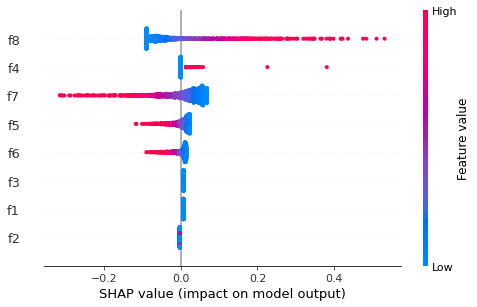

<Figure size 432x288 with 0 Axes>

In [122]:
fig = shap.plots.beeswarm(shap_values,order=shap_values.abs.max(0))
plt.savefig('shap.png')

In [104]:
clf.coef_

array([[-0.59135173,  0.51222125, -3.86905319,  0.0080693 , -0.02130809,
        -0.01789016, -0.06202701,  0.10384591]])

In [109]:
np.exp(clf.coef_)

array([[0.55357849, 1.66899434, 0.02087813, 1.00810195, 0.97891732,
        0.98226892, 0.9398575 , 1.10942949]])